# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [127]:
# Import warnings
import warnings
warnings.filterwarnings(action="ignore")


In [129]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [133]:
# Try loading one file
# using macOS 
df = pd.read_parquet('/Users/akoyada/Work/AIML/EDA-Graded/DatasetsAndDictionary/trip_records/2023-1.parquet')
df.info()

# Total rows in the 2023-1.parquet file is 3066765 and the file size is around 75MB.
# These are all large files each having records more than 3M in each file. So loading all the 12 files and combining all the data in to one 
# for analysis is not feasible. So we should talke sample fraction of data from each file to analyse the various patterns.

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [135]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
# using macOS
df = pd.read_parquet('/Users/akoyada/Work/AIML/EDA-Graded/DatasetsAndDictionary/trip_records/2023-1.parquet')
df.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [137]:

# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# using macOS
# Select the folder having data files
#os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')
os.chdir('/Users/akoyada/Work/AIML/EDA-Graded/DatasetsAndDictionary/trip_records/')
#os.chdir('./../../DatasetsAndDictionary/trip_records')
# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()
final_sampled_data = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        #print(file_path)
        # Reading the current file
        monthly_sample_data = pd.DataFrame()
        df = pd.read_parquet(file_path)
        df = df[df['tpep_pickup_datetime'].dt.year==2023]

        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.

        # Loop through dates and then loop through every hour of each date
        for cur_date in df['date'].unique():
            date_wise_data = pd.DataFrame()
            date_wise_data = df.loc[df["date"]==cur_date]
    
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_wise_data.loc[date_wise_data['hour']==hour]

                if not hour_data.empty:
                    # Sample 5% of the hourly data randomly
                    sampled_data = hour_data.sample(frac=0.0004, random_state=42)
                    # add data of this hour to the dataframe
                    monthly_sample_data = pd.concat([monthly_sample_data, sampled_data])

             # Concatenate the sampled data of all the dates to a single dataframe
            
            final_sampled_data = pd.concat([final_sampled_data, monthly_sample_data])
       # df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
print(final_sampled_data.info()) 

Error reading file .DS_Store: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
<class 'pandas.core.frame.DataFrame'>
Index: 274611 entries, 1788 to 3204822
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               274611 non-null  int64         
 1   tpep_pickup_datetime   274611 non-null  datetime64[us]
 2   tpep_dropoff_datetime  274611 non-null  datetime64[us]
 3   passenger_count        266761 non-null  float64       
 4   trip_distance          274611 non-null  float64       
 5   RatecodeID             266761 non-null  float64       
 6   store_and_fwd_flag     266761 non-null  object        
 7   PULocationID           274611 non-null  int64         
 8   DOLocationID           274611 non-null  int64         
 9   payment_type           274611 non-null  int64 

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [139]:
# Store the df in csv/parquet
# df.to_parquet('')
final_sampled_data.to_parquet("final_sample_data.parquet")


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [141]:
# Load the new data file
sampled_df=pd.read_parquet("final_sample_data.parquet")

In [143]:
# df.head()
sampled_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
4816            2  2023-12-01 01:17:31   2023-12-01 01:22:54              2.0   
6684            1  2023-12-01 02:27:18   2023-12-01 02:41:43              1.0   
10435           1  2023-12-01 06:33:41   2023-12-01 07:45:45              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
4816              1.48         1.0                  N           164   
6684              4.30         1.0                  N             4   
10435            13.10        99.0                  N           188   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1788               50             1  ...      0.5        5.66           0.0   
3196699            61             0  ...      0.5        3.00           0.0   
4816              249             1  ...      0.5        2.72           0.0   
6684              230             1  ...      0.5        4.95           0.0   
10435              82             1  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1788                       1.0         33.96                   2.5   
3196699                    1.0         29.43                   NaN   
4816                       1.0         16.32                   2.5   
6684                       1.0         29.75                   2.5   
10435                      1.0         35.00                   0.0   

         Airport_fee        date  hour airport_fee  
1788             0.0  2023-12-01     0         NaN  
3196699          NaN  2023-12-01     0         NaN  
4816             0.0  2023-12-01     1         NaN  
6684             0.0  2023-12-01     2         NaN  
10435            0.0  2023-12-01     6         NaN  

[5 rows x 22 columns]

In [145]:
# df.info()
sampled_df.info()
sampled_df.shape[0]

<class 'pandas.core.frame.DataFrame'>
Index: 274611 entries, 1788 to 3204822
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               274611 non-null  int64         
 1   tpep_pickup_datetime   274611 non-null  datetime64[us]
 2   tpep_dropoff_datetime  274611 non-null  datetime64[us]
 3   passenger_count        266761 non-null  float64       
 4   trip_distance          274611 non-null  float64       
 5   RatecodeID             266761 non-null  float64       
 6   store_and_fwd_flag     266761 non-null  object        
 7   PULocationID           274611 non-null  int64         
 8   DOLocationID           274611 non-null  int64         
 9   payment_type           274611 non-null  int64         
 10  fare_amount            274611 non-null  float64       
 11  extra                  274611 non-null  float64       
 12  mta_tax                274611 non-null  float

274611

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [147]:
# Fix the index and drop any columns that are not needed
sampled_df.reset_index(drop=True, inplace=True)
sampled_df.drop(columns=['date','hour'], inplace=True)
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274611 entries, 0 to 274610
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               274611 non-null  int64         
 1   tpep_pickup_datetime   274611 non-null  datetime64[us]
 2   tpep_dropoff_datetime  274611 non-null  datetime64[us]
 3   passenger_count        266761 non-null  float64       
 4   trip_distance          274611 non-null  float64       
 5   RatecodeID             266761 non-null  float64       
 6   store_and_fwd_flag     266761 non-null  object        
 7   PULocationID           274611 non-null  int64         
 8   DOLocationID           274611 non-null  int64         
 9   payment_type           274611 non-null  int64         
 10  fare_amount            274611 non-null  float64       
 11  extra                  274611 non-null  float64       
 12  mta_tax                274611 non-null  floa

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [149]:
# Combine the two airport fee columns
if 'airport_fee' in sampled_df.columns and 'Airport_fee' in sampled_df.columns:
    sampled_df['airport_fee_combined'] = sampled_df['airport_fee'].combine_first(sampled_df['Airport_fee'])
    sampled_df.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)
    sampled_df.rename(columns={'airport_fee_combined': 'Airport_fee'}, inplace=True)

sampled_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274611 entries, 0 to 274610
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               274611 non-null  int64         
 1   tpep_pickup_datetime   274611 non-null  datetime64[us]
 2   tpep_dropoff_datetime  274611 non-null  datetime64[us]
 3   passenger_count        266761 non-null  float64       
 4   trip_distance          274611 non-null  float64       
 5   RatecodeID             266761 non-null  float64       
 6   store_and_fwd_flag     266761 non-null  object        
 7   PULocationID           274611 non-null  int64         
 8   DOLocationID           274611 non-null  int64         
 9   payment_type           274611 non-null  int64         
 10  fare_amount            274611 non-null  float64       
 11  extra                  274611 non-null  float64       
 12  mta_tax                274611 non-null  floa

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [151]:
# check where values of fare amount are negative
negative_fares = sampled_df[sampled_df['fare_amount'] < 0]

if not negative_fares.empty:
    print("There are negative fare amount values.")
else:
    print("There are no negative fare amount values.")



There are no negative fare amount values.


Did you notice something different in the `RatecodeID` column for above records?

In [153]:
# Analyse RatecodeID for the negative fare amounts

RatecodeId = sampled_df[sampled_df['fare_amount'] < 0]['RatecodeID']
print("Ratecode IDs with negative fare amounts", RatecodeId.count())

Ratecode IDs with negative fare amounts 0


In [155]:
# Find which columns have negative values

negative_columns = [column for column in sampled_df.columns if sampled_df[column].dtype in ['int64', 'float64'] and (sampled_df[column] < 0).any()]
print("Columns with negative values:", negative_columns)


Columns with negative values: []


In [157]:
# fix these negative values

print("No action required as there are no negative values")


No action required as there are no negative values


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [159]:
# Find the proportion of missing values in each column

missing_percentage = sampled_df.isnull().mean()
print(missing_percentage*100)



VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          2.858589
trip_distance            0.000000
RatecodeID               2.858589
store_and_fwd_flag       2.858589
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     2.858589
Airport_fee              2.858589
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [161]:
# Display the rows with null values
rows_with_null_passenger_count = sampled_df[sampled_df['passenger_count'].isnull()]
print(rows_with_null_passenger_count)

# Impute NaN values in 'passenger_count'
#impute NaN values with mean
mean_value = sampled_df['passenger_count'].mode()[0]
sampled_df['passenger_count'].fillna(mean_value, inplace=True)

rows_with_zero_passenger_count = sampled_df[sampled_df['passenger_count'] == 0]
print(rows_with_zero_passenger_count)
#handle rows with passenger_count 0 and impute with mode
sampled_df['passenger_count'].replace(0, mean_value, inplace=True)

sampled_df['passenger_count'].value_counts()

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1              2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
15             2  2023-12-01 12:26:46   2023-12-01 12:58:37              NaN   
16             2  2023-12-01 12:31:09   2023-12-01 12:44:32              NaN   
26             2  2023-12-01 16:22:54   2023-12-01 16:32:05              NaN   
38             1  2023-12-01 19:12:49   2023-12-01 19:20:19              NaN   
...          ...                  ...                   ...              ...   
274406         2  2023-06-25 17:40:13   2023-06-25 17:53:57              NaN   
274436         6  2023-06-26 15:06:57   2023-06-26 17:06:26              NaN   
274444         2  2023-06-26 18:16:51   2023-06-26 18:30:21              NaN   
274519         2  2023-06-28 17:58:38   2023-06-28 18:31:48              NaN   
274569         1  2023-06-29 20:04:29   2023-06-29 20:11:53              NaN   

        trip_distance  RatecodeID store

passenger_count
1.0    212981
2.0     40328
3.0      9511
4.0      6129
5.0      3626
6.0      2036
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [163]:
# Fix missing values in 'RatecodeID'

#count of missing values in 'RatecodeID'
total_missing_values_ratecardId = sampled_df['RatecodeID'].isnull().sum()
ratecard_id_mode = sampled_df['RatecodeID'].mode()[0]

#fill missing values in 'RatecodeID' with mode value
sampled_df['RatecodeID'].fillna(ratecard_id_mode, inplace=True)
sampled_df['RatecodeID'].value_counts()

RatecodeID
1.0     260398
2.0       9997
5.0       1531
99.0      1418
3.0        816
4.0        451
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [165]:
# handle null values in congestion_surcharge
total_null_values_in_congestion_surcharge = sampled_df['congestion_surcharge'].isnull().sum()
print(total_null_values_in_congestion_surcharge)
congestion_surcharge_mean = round(sampled_df['congestion_surcharge'].mean(), 2)
sampled_df['congestion_surcharge'].fillna(congestion_surcharge_mean, inplace=True)
sampled_df['congestion_surcharge'].isnull().sum()

7850


0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [167]:
# Handle any remaining missing values
sampled_df.isnull().mean()
# store_and_fwd_flag and Airport_fee has missing values

# impute null values in store_and_fwd_flag with mode
store_and_fwd_flag_mode = sampled_df['store_and_fwd_flag'].mode()[0]
sampled_df['store_and_fwd_flag'].fillna(store_and_fwd_flag_mode, inplace=True)

# impute null values in Airport_fee with mean
Airport_fee_mode = round(sampled_df['Airport_fee'].mean(), 2)
sampled_df['Airport_fee'].fillna(Airport_fee_mode, inplace=True)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

<Axes: ylabel='fare_amount'>

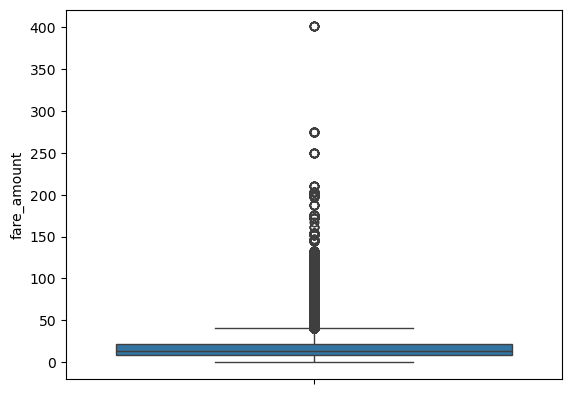

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
#sampled_df['passenger_count'].value_counts()

sns.boxplot(sampled_df['fare_amount'])
#sns.boxplot(sampled_df['trip_distance'])

#sns.boxplot(sampled_df['payment_type'])


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [171]:
# remove passenger_count > 6
sampled_df = sampled_df[sampled_df['passenger_count'] <= 6]

In [173]:
# Continue with outlier handling
# remove rows with payment_type 0
sampled_df = sampled_df[sampled_df['payment_type'] != 0]

# remove trip distance with more than 250 miles
sampled_df = sampled_df[sampled_df['trip_distance'] <= 250]

#remove outliers where the fare amount is more than 150
sampled_df = sampled_df[sampled_df['fare_amount'] <= 150]


#sampled_df.info()
# handle outliers where trip_distance and fare_amount is 0 but the pickup and dropoff ones are different
sampled_df = sampled_df[~((sampled_df['fare_amount'] == 0) & (sampled_df['trip_distance'] == 0) & (sampled_df['PULocationID'] != sampled_df['DOLocationID']))]


# remove entried with fare_amount value 0 and trip_distance greater than 300
sampled_df = sampled_df[~((sampled_df['fare_amount'] == 0) & (sampled_df['trip_distance'] > 300))]

#remove entries with RatecodeID value other than 1,2,3,4,5,6
sampled_df = sampled_df[sampled_df['RatecodeID'].isin({1,2,3,4,5,6})]



In [175]:
# Do any columns need standardising?
sampled_df['extra'].value_counts()


extra
0.00     100981
2.50      69543
1.00      51887
5.00      19248
3.50      14169
6.00       2308
7.50       2299
9.25        874
4.25        808
1.75        527
10.25       345
3.75        338
6.75        262
7.75        262
8.75        206
2.75        180
2.25        156
1.25        142
11.75       136
6.25        125
7.25         96
9.75         65
11.25        56
10.00        51
5.25         22
2.72         12
Name: count, dtype: int64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [177]:
sampled_df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

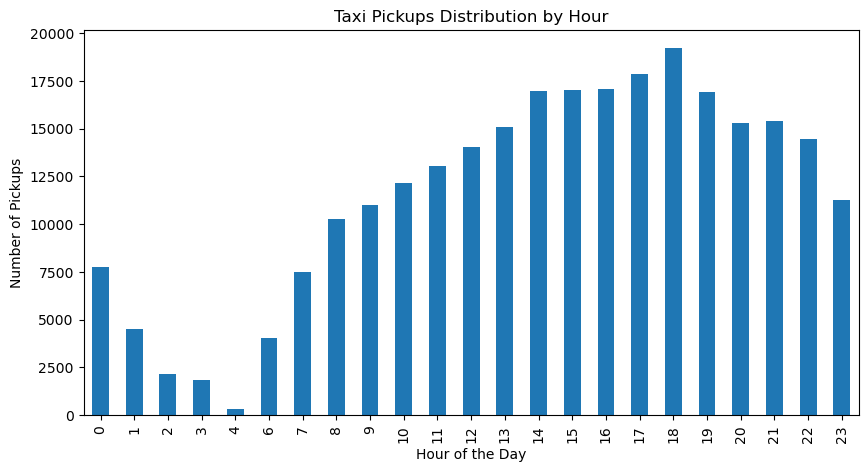

In [179]:
# Find and show the hourly trends in taxi pickups
trip_df = sampled_df;
trip_df['hour'] = trip_df['tpep_pickup_datetime'].dt.hour
hourly_taxi_pickups = trip_df.groupby('hour').size()
plt.figure(figsize=(10,5))
hourly_taxi_pickups.plot(kind='bar')
plt.ylabel('Number of Pickups')
plt.xlabel('Hour of the Day')
plt.title("Taxi Pickups Distribution by Hour")
plt.show()


Text(0, 0.5, 'Number of Pickups')

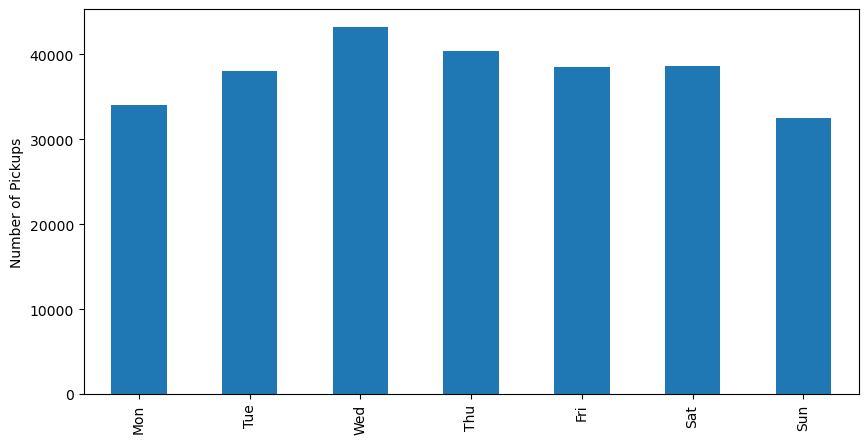

In [181]:
# Find and show the daily trends in taxi pickups (days of the week)

trip_df = sampled_df;
trip_df['day_of_week'] = trip_df['tpep_pickup_datetime'].dt.dayofweek
daily_taxi_pickups = trip_df.groupby('day_of_week').size()
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_taxi_pickups.index = [day_names[int(day)] for day in daily_taxi_pickups.index]
plt.figure(figsize=(10,5))
daily_taxi_pickups.plot(kind='bar')
plt.ylabel('Number of Pickups')




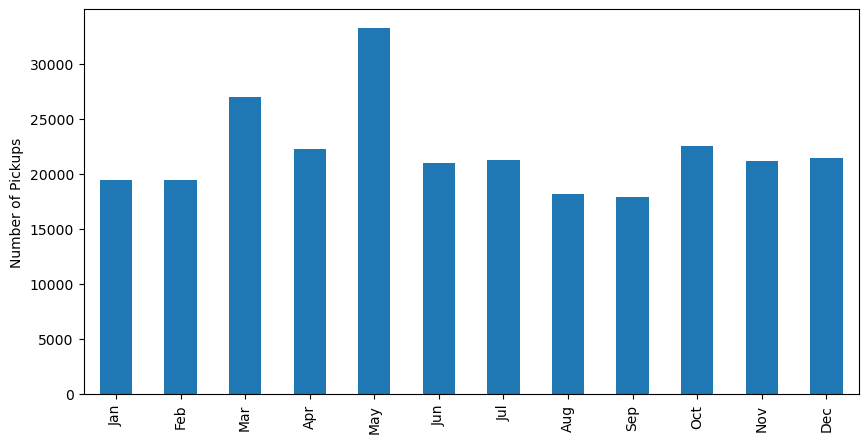

In [183]:
# Show the monthly trends in pickups

trip_df = sampled_df;
trip_df['month'] = trip_df['tpep_pickup_datetime'].dt.month
monthly_taxi_pickups = trip_df.groupby('month').size()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10,5))
monthly_taxi_pickups.index = [month_names[int(month-1)] for month in monthly_taxi_pickups.index]
monthly_taxi_pickups.plot(kind='bar')
plt.ylabel('Number of Pickups')

#drop temp columns added
trip_df=trip_df.drop(columns=['month'])


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [185]:
# Analyse the above parameters

trip_df = sampled_df;
tip_amount_zeros = (trip_df['tip_amount'] == 0).sum()
fare_amount_zeros = (trip_df['fare_amount'] == 0).sum()
trip_distance_zeros = (trip_df['trip_distance'] == 0).sum()
total_amount_zeros = (trip_df['total_amount'] == 0).sum()


tip_amount_negative = (trip_df['tip_amount'] < 0).sum()
fare_amount_negative = (trip_df['fare_amount'] < 0).sum()
trip_distance_negative = (trip_df['trip_distance'] < 0).sum()
total_amount_negative = (trip_df['total_amount'] < 0).sum()


print(f"Number of zero fare_amount entries: {fare_amount_zeros}")
print(f"Number of zero trip_distance entries: {trip_distance_zeros}")
print(f"Number of zero total_amount entries: {tip_amount_zeros}")
print(f"Number of zero tip_amount entries: {tip_amount_zeros}")

print(f"Number of negative fare_amount entries: {fare_amount_negative}")
print(f"Number of negative trip_distance entries: {trip_distance_negative}")
print(f"Number of negative total_amount entries: {total_amount_negative}")
print(f"Number of negattive tip_amount entries: {tip_amount_negative}")



Number of zero fare_amount entries: 44
Number of zero trip_distance entries: 2977
Number of zero total_amount entries: 56865
Number of zero tip_amount entries: 56865
Number of negative fare_amount entries: 0
Number of negative trip_distance entries: 0
Number of negative total_amount entries: 0
Number of negattive tip_amount entries: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

No. Above parameters with zero values gives some indights on the data when corelated with pickup datetime, location and number of customers.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [187]:
# Create a df with non zero entries for the selected parameters.
trip_df = sampled_df
trip_df = trip_df[~((trip_df['fare_amount'] == 0) | (trip_df['total_amount'] == 0) | (trip_df['tip_amount'] == 0))]

trip_df = trip_df[~((trip_df['trip_distance'] == 0) & (trip_df['PULocationID'] != trip_df['DOLocationID']))]

tip_amount_zeros = (trip_df['tip_amount'] <= 0).sum()
fare_amount_zeros = (trip_df['fare_amount'] <= 0).sum()
trip_distance_zeros = (trip_df['trip_distance'] <= 0).sum()
total_amount_zeros = (trip_df['total_amount'] <= 0).sum()

print(f"Number of zero fare_amount entries: {fare_amount_zeros}")
print(f"Number of zero trip_distance entries: {trip_distance_zeros}")
print(f"Number of zero total_amount entries: {total_amount_zeros}")
print(f"Number of zero tip_amount entries: {tip_amount_zeros}")

Number of zero fare_amount entries: 0
Number of zero trip_distance entries: 896
Number of zero total_amount entries: 0
Number of zero tip_amount entries: 0


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [189]:
# Group data by month and analyse monthly revenue
trip_df = sampled_df
trip_df['pickup_datetime'] = pd.to_datetime(trip_df['tpep_pickup_datetime'])
trip_df['dropoff_datetime'] = pd.to_datetime(trip_df['tpep_dropoff_datetime'])

trip_df['year_month'] = trip_df['pickup_datetime'].dt.to_period('M')

monthly_revenue = trip_df.groupby('year_month')['total_amount'].sum()
plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='bar')
#drop added columns
trip_df=trip_df.drop(columns=['pickup_datetime', 'year_month'])




**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [191]:
# Calculate proportion of each quarter
trip_data = sampled_df
trip_data['year_quarter'] = trip_data['pickup_datetime'].dt.to_period('Q')
quarterly_revenue = trip_data.groupby('year_quarter')['total_amount'].sum()

total_revenue = quarterly_revenue.sum()
quarterly_revenue_proportion = ((quarterly_revenue / total_revenue) * 100).reset_index(name='Reveue')

print(quarterly_revenue_proportion)

  year_quarter     Reveue
0       2023Q1  23.646670
1       2023Q2  28.865719
2       2023Q3  22.030930
3       2023Q4  25.456681


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.95


Text(0.5, 0, 'Trip Distance')

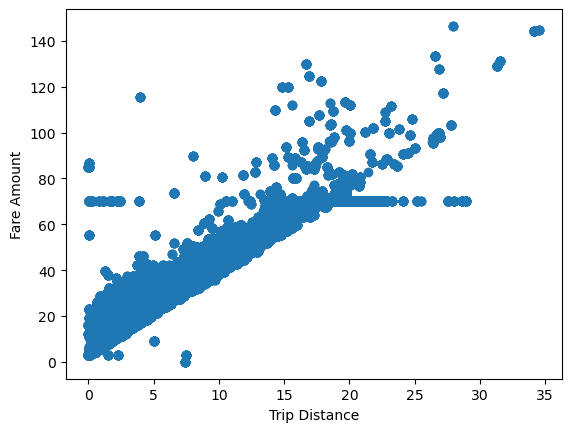

In [193]:
# Show how trip fare is affected by distance
trip_df = sampled_df[~(sampled_df['trip_distance'] == 0)]

correlation = trip_df[['trip_distance', 'fare_amount']].corr().iloc[0, 1]
print(f"Correlation between trip_distance and fare_amount: {correlation:.2f}")

plt.scatter(x=trip_df['trip_distance'], y=trip_df['fare_amount'])
plt.ylabel('Fare Amount')
plt.xlabel('Trip Distance')




**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Text(0, 0.5, 'Fare Amount')

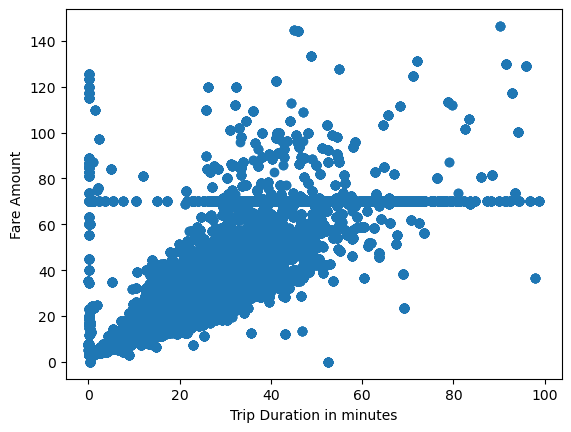

In [211]:
# Show relationship between fare and trip duration

# Calculate the trip duration in minutes
sampled_df['trip_duration'] = (sampled_df['tpep_dropoff_datetime'] - sampled_df['tpep_pickup_datetime']).dt.total_seconds() / 60
sampled_df_calc=sampled_df[~(sampled_df['trip_duration'] > 100)]

plt.scatter(sampled_df_calc['trip_duration'], sampled_df_calc['fare_amount'])
plt.xlabel('Trip Duration in minutes')
plt.ylabel('Fare Amount')


In [213]:
# Show relationship between fare and number of passengers

plt.scatter(sampled_df['passenger_count'], sampled_df['fare_amount'])
plt.ylabel('Fare Amount')
plt.xlabel('Passenger Count')


Text(0.5, 0, 'Passenger Count')

In [215]:
# Show relationship between tip and trip distance
plt.scatter(sampled_df['trip_distance'], sampled_df['tip_amount'])
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')



Text(0, 0.5, 'Tip Amount')

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

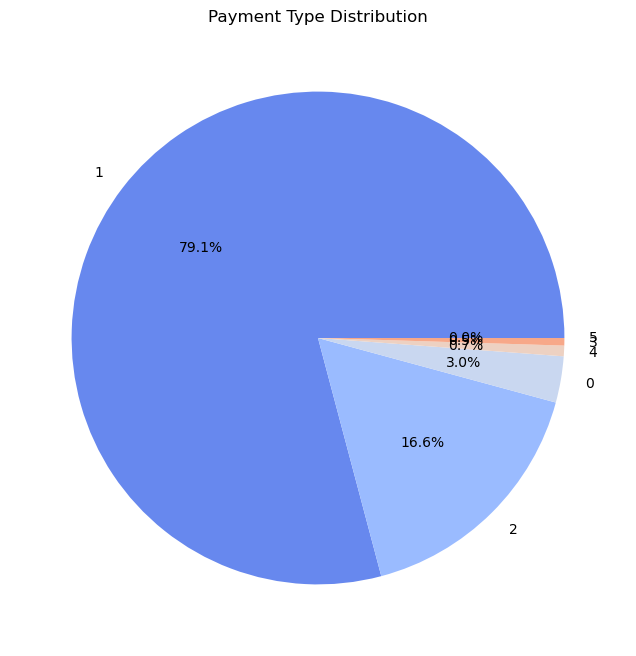

In [223]:
# Analyse the distribution of different payment types (payment_type).

payment_mapping = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}
payment_type_counts = sampled_df['payment_type'].map(payment_mapping).value_counts()
payment_type_counts.plot(kind='bar')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')

payments_counts = df['payment_type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(payments_counts, labels=payments_counts.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(payments_counts)))
plt.title('Payment Type Distribution')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [52]:
#!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.0 MB/s eta 0:00:00a 0:00:01


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [231]:
import geopandas as gpd

# Read the shapefile using geopandas
#zones = # read the .shp file using gpd
zones = gpd.read_file("/Users/akoyada/Work/AIML/EDA-Graded/DatasetsAndDictionary/taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

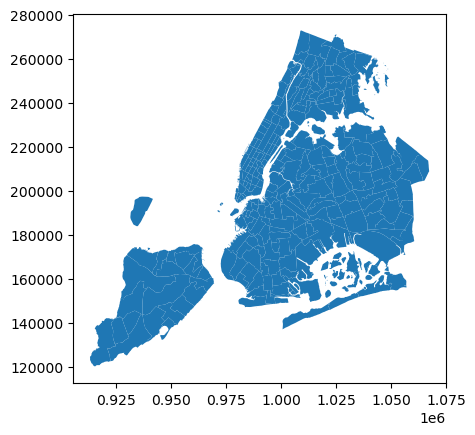

In [233]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [235]:
# Merge zones and trip records using locationID and PULocationID
merged_trip_data = pd.merge(sampled_df, zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_trip_data.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 01:17:31   2023-12-01 01:22:54              2.0   
2         1  2023-12-01 02:27:18   2023-12-01 02:41:43              1.0   
3         1  2023-12-01 07:20:23   2023-12-01 07:26:35              1.0   
4         1  2023-12-01 08:04:19   2023-12-01 08:14:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           1.48         1.0                  N           164           249   
2           4.30         1.0                  N             4           230   
3           1.40         1.0                  N           107           162   
4           1.40         1.0                  N           116           244   

   payment_type  ...  year_month  year_quarter  trip_duration  OBJECTID  \
0             1  ...     2023-12        2023Q4      22.350000     148.0   
1             1  ...     2023-12        2023Q4       5.383333     164.0   
2             1  ...     2023-12        2023Q4      14.416667       4.0   
3             1  ...     2023-12        2023Q4       6.200000     107.0   
4             1  ...     2023-12        2023Q4       9.683333     116.0   

   Shape_Leng  Shape_Area              zone  LocationID    borough  \
0    0.039131    0.000070   Lower East Side       148.0  Manhattan   
1    0.035772    0.000056     Midtown South       164.0  Manhattan   
2    0.043567    0.000112     Alphabet City         4.0  Manhattan   
3    0.038041    0.000075          Gramercy       107.0  Manhattan   
4    0.068116    0.000260  Hamilton Heights       116.0  Manhattan   

                                            geometry  
0  POLYGON ((988552.836 201677.665, 988387.669 20...  
1  POLYGON ((988787.425 210315.593, 988662.868 21...  
2  POLYGON ((992073.467 203714.076, 992068.667 20...  
3  POLYGON ((989131.643 205749.904, 989084.531 20...  
4  POLYGON ((1001062.709 241053.769, 1000940.914 ...  

[5 rows x 34 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [237]:
# Group data by location and calculate the number of trips
trips_per_location = merged_trip_data.groupby("LocationID").size().reset_index(name='total_number_of_trips')
trips_per_location.head()

LocationID  total_number_of_trips
0         1.0                     51
1         4.0                    319
2         7.0                    113
3        10.0                    147
4        12.0                     43

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [243]:
# Merge trip counts back to the zones GeoDataFrame
merged_zones_data = pd.merge(zones, trips_per_location, left_on='LocationID', right_on='LocationID', how='left')
merged_zones_data['total_number_of_trips'] = merged_zones_data['total_number_of_trips'].fillna(0)
merged_zones_data.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   total_number_of_trips  
0                   51.0  
1                    0.0  
2                    0.0  
3                  319.0  
4                    0.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [247]:
# Define figure and axis
merged_zones_data['total_number_of_trips'] = merged_zones_data['total_number_of_trips'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
merged_zones_data.plot("total_number_of_trips", ax=ax, legend=True, legend_kwds = {'label': "Zone Wise Trips", 'orientation': "horizontal"})
plt.show()


In [373]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones_data = merged_zones_data.sort_values(by='total_number_of_trips')
sorted_zones_data.head()



OBJECTID  Shape_Leng  Shape_Area                  zone  LocationID  \
28         29    0.071408    0.000202        Brighton Beach          29   
126       127    0.060019    0.000163                Inwood         127   
41         42    0.092709    0.000264  Central Harlem North          42   
48         49    0.075290    0.000203          Clinton Hill          49   
36         37    0.142810    0.000452        Bushwick South          37   

       borough                                           geometry  \
28    Brooklyn  POLYGON ((995347.323 151779.902, 995636.437 15...   
126  Manhattan  MULTIPOLYGON (((1008801.909 257357.719, 100881...   
41   Manhattan  POLYGON ((1002413.191 243934.56, 1002388.021 2...   
48    Brooklyn  POLYGON ((995169.765 192967.111, 995298.245 19...   
36    Brooklyn  POLYGON ((1002791.711 196025.081, 1002823.637 ...   

     total_number_of_trips  
28                     2.0  
126                    3.0  
41                     5.0  
48                     6.0  
36                     6.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
  # Busiest hours are 5 PM to 8Pm and busiest hour is 6 PM
  # Busiest day is Wednesday
  # Busiest Month is May
  
* Trends in revenue collected
   # Revenues are high in May month 
  
* Trends in quarterly revenue
  # Q1 has highest revenues
  
* How fare depends on trip distance, trip duration and passenger counts
  # Fare has positive corelation with trip distance and trip duration  
  
* How tip amount depends on trip distance
   # No corelation between tip amount and trip distance   
  
* Busiest zones
  # Midtown Centre


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [269]:
# Find routes which have the slowest speeds at different times of the day

grouped_data = sampled_df.groupby(['PULocationID', 'DOLocationID', 'trip_distance']).agg({'trip_duration': 'mean'}).reset_index()

#remove entries with zero trip distance
grouped_data = grouped_data[~(grouped_data['trip_distance'] == 0.00)] 
grouped_data['average_speed'] = grouped_data['trip_duration']/grouped_data['trip_distance']

grouped_data = grouped_data.sort_values(by='average_speed')
print(grouped_data.head(1))


#Below is the slow route
#PULocationID  DOLocationID  trip_distance  trip_duration  average_speed
#      265           265           15.0       0.366667       0.024444

       PULocationID  DOLocationID  trip_distance  trip_duration  average_speed
13347           265           265           15.0       0.366667       0.024444


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Text(0, 0.5, 'Total trip count')

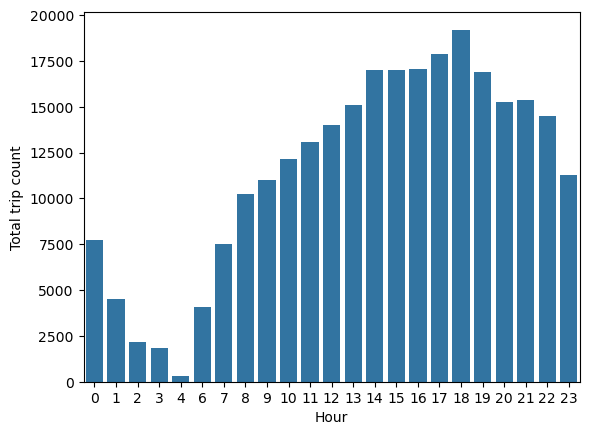

In [271]:
# Visualise the number of trips per hour and find the busiest hour

sampled_df['hour'] = sampled_df['tpep_pickup_datetime'].dt.hour
hourly_taxi_pickups = sampled_df.groupby('hour').size().reset_index(name='total_trips')
sorted_hourly_taxi_pickups=hourly_taxi_pickups.sort_values(by='total_trips', ascending=False)
#sorted_hourly_taxi_pickups.head(1)

sns.barplot(x='hour', y='total_trips', data=hourly_taxi_pickups)
plt.xlabel('Hour')
plt.ylabel('Total trip count')
#6PM is the busiest hour

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [273]:
# Scale up the number of trips

#sample_fraction = 0.004
#hourly_trips = sampled_df.groupby('hour').size().reset_index(name='trip_count')
#hourly_trips['actual_trips'] = hourly_trips['trip_count'] / 0.004


# Fill in the value of your sampling fraction and use that to scale up the numbers
#sample_fraction =

hourly_taxi_pickups = sampled_df.groupby('hour').size().reset_index(name='total_trips')
sorted_hourly_taxi_pickups=hourly_taxi_pickups.sort_values(by='total_trips', ascending=False)
total_number_oftrips_five_busiest_hours=sorted_hourly_taxi_pickups.head(5)['total_trips'].sum()
print("Total number od trips in the five business hours")
print(total_number_oftrips_five_busiest_hours)


Total number od trips in the five business hours
88134


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

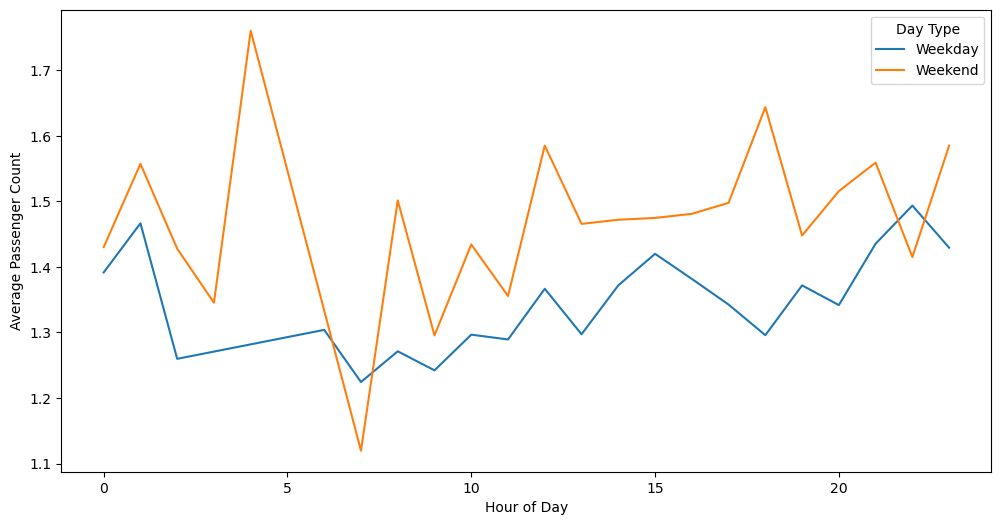

In [287]:
# Compare traffic trends for the week days and weekends

sampled_df['day_week'] = sampled_df['tpep_pickup_datetime'].dt.dayofweek
sampled_df['day_type'] = sampled_df['day_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
sampled_df['hour_of_day'] = sampled_df['tpep_pickup_datetime'].dt.hour

sampled_df['weekday_weekend'] = sampled_df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
grouped_data = sampled_df.groupby(['hour_of_day', 'weekday_weekend'])
# average passenger count for each group
average_passenger_count = grouped_data['passenger_count'].mean().reset_index()

# Plot the line plots
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_of_day', y='passenger_count', hue='weekday_weekend', data=average_passenger_count)
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.legend(title='Day Type')
plt.show()




What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Text(0, 0.5, 'Number of Dropoffs')

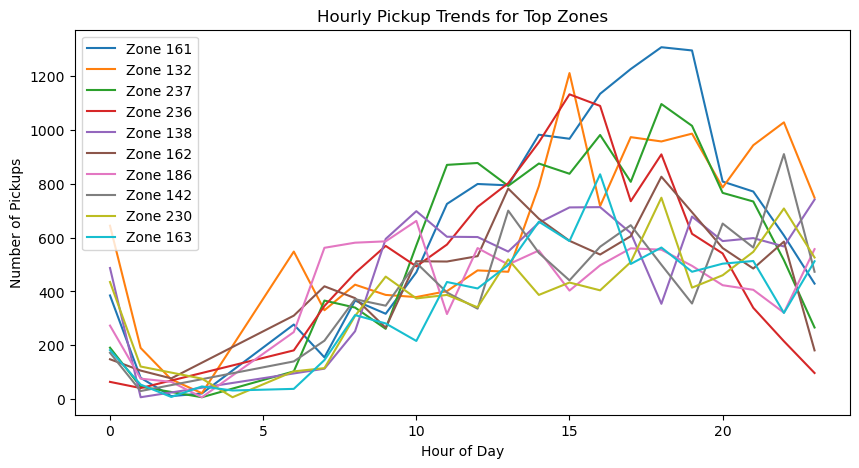

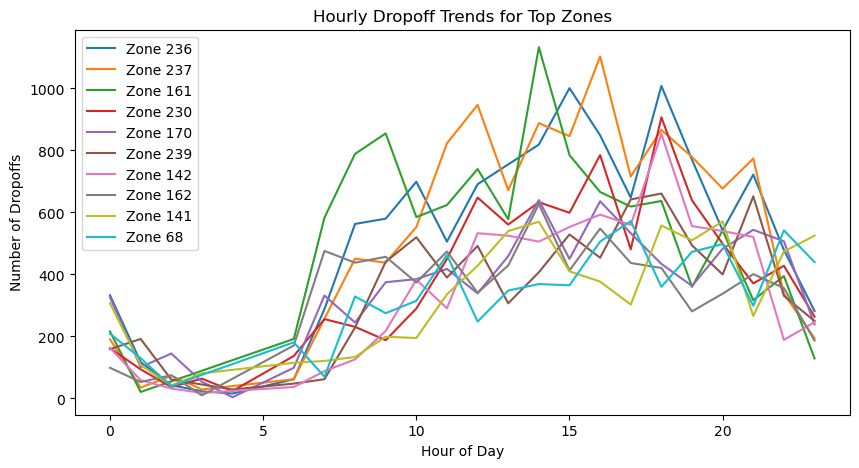

In [289]:
# Find top 10 pickup and dropoff zones


sampled_df['pickup_hour'] = sampled_df['tpep_pickup_datetime'].dt.hour
sampled_df['dropoff_hour'] = sampled_df['tpep_dropoff_datetime'].dt.hour

pickup_counts = sampled_df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')
dropoff_counts = sampled_df.groupby(['DOLocationID', 'dropoff_hour']).size().reset_index(name='dropoff_count')

# top 10 zones for pickups and dropoffs
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index

# filter pickup and dropoff counts for top zones
top_pickup_trends = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]
top_dropoff_trends = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]


# pick up trends
plt.figure(figsize=(10, 5))
for zone in top_pickup_zones:
    zone_data = top_pickup_trends[top_pickup_trends['PULocationID'] == zone]
    plt.plot(zone_data['pickup_hour'], zone_data['pickup_count'], label=f'Zone {zone}')
plt.title('Hourly Pickup Trends for Top Zones')
plt.xlabel('Hour of Day')
plt.legend()
plt.ylabel('Number of Pickups')


#  dropoff trends
plt.figure(figsize=(10, 5))
for zone in top_dropoff_zones:
    zone_data = top_dropoff_trends[top_dropoff_trends['DOLocationID'] == zone]
    plt.plot(zone_data['dropoff_hour'], zone_data['dropoff_count'], label=f'Zone {zone}')
plt.title('Hourly Dropoff Trends for Top Zones')
plt.xlabel('Hour of Day')
plt.legend()
plt.ylabel('Number of Dropoffs')



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [291]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



pickup_counts = sampled_df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')
dropoff_counts = sampled_df.groupby(['DOLocationID', 'dropoff_hour']).size().reset_index(name='dropoff_count')

# Merge the pickup and dropoff
zone_counts = pd.merge(pickup_counts, dropoff_counts, left_on='PULocationID', right_on='DOLocationID', how='outer')
zone_counts = zone_counts.fillna(0)

#calculate ratio
zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count']

# infinite values with NaN
zone_counts.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
zone_counts['pickup_dropoff_ratio'].fillna(0, inplace=True)

# 10 highest ratios and lowest ratios
highest_ratios = zone_counts.nlargest(10, 'pickup_dropoff_ratio')
lowest_ratios = zone_counts.nsmallest(10, 'pickup_dropoff_ratio')

print("10 Highest Pickup/Dropoff Ratios:")
print(highest_ratios[['PULocationID', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("10 Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios[['PULocationID', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


10 Highest Pickup/Dropoff Ratios:
       PULocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
18686         229.0         502.0            3.0            167.333333
16550         170.0         666.0            4.0            166.500000
16527         170.0         609.0            4.0            152.250000
16481         170.0         584.0            4.0            146.000000
18708         229.0         437.0            3.0            145.666667
18752         229.0         427.0            3.0            142.333333
13602         158.0         268.0            2.0            134.000000
16504         170.0         530.0            4.0            132.500000
16435         170.0         526.0            4.0            131.500000
16320         170.0         507.0            4.0            126.750000
10 Lowest Pickup/Dropoff Ratios:
     PULocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
322           0.0           0.0           32.0                   0.0
323           

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

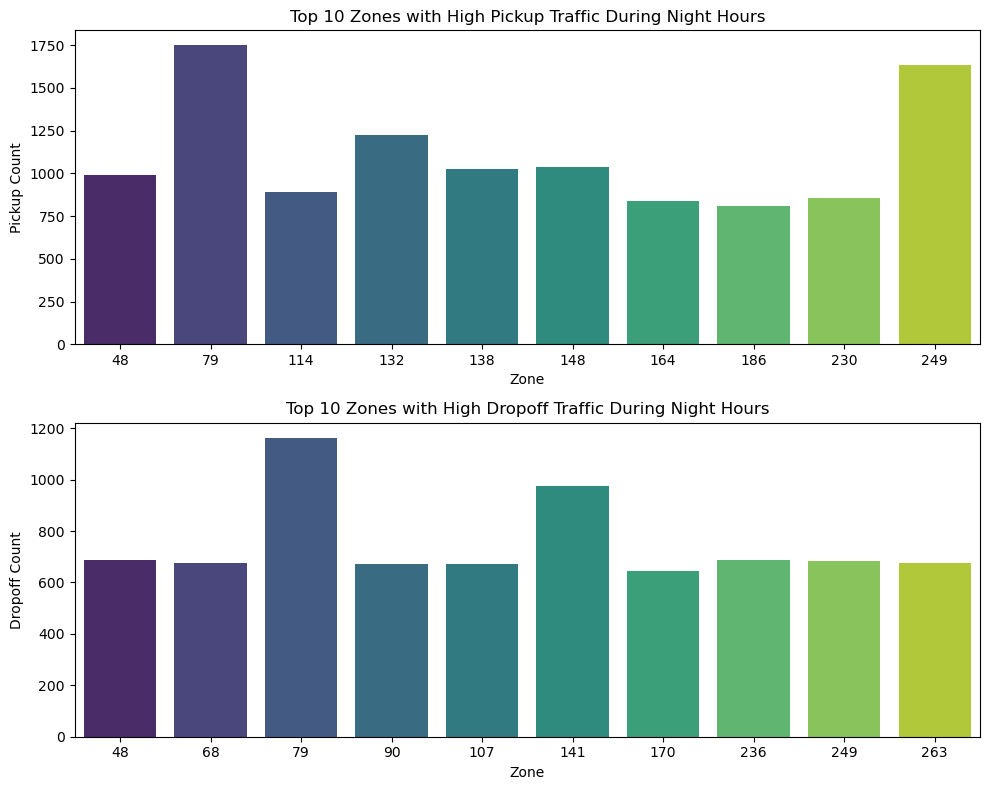

In [709]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

sampled_df['hour_of_day'] = sampled_df['tpep_pickup_datetime'].dt.hour

# filter t data for night hours 
night_hours_data = sampled_df[(sampled_df['hour_of_day'] >= 23) | (sampled_df['hour_of_day'] < 5)]

# group data
pickup_counts = night_hours_data['PULocationID'].value_counts().reset_index()
dropoff_counts = night_hours_data['DOLocationID'].value_counts().reset_index()

pickup_counts.columns = ['Zone', 'Pickup_Count']
dropoff_counts.columns = ['Zone', 'Dropoff_Count']


plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='Zone', y='Pickup_Count', data=pickup_counts.head(10), palette='viridis')
plt.xlabel('Zone')
plt.ylabel('Pickup Count')
plt.title('Top 10 Zones with High Pickup Traffic During Night Hours')

plt.subplot(2, 1, 2)
sns.barplot(x='Zone', y='Dropoff_Count', data=dropoff_counts.head(10), palette='viridis')
plt.xlabel('Zone')
plt.ylabel('Dropoff Count')
plt.title('Top 10 Zones with High Dropoff Traffic During Night Hours')
plt.tight_layout()
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

  time_period  total_amount  revenue_share
0     daytime    5444258.95      88.706394
1   nighttime     693132.84      11.293606


<Axes: ylabel='revenue_share'>

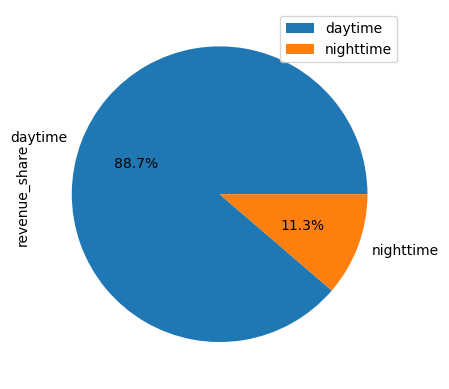

In [675]:
# Filter for night hours (11 PM to 5 AM)

sampled_df['pickup_hour'] = sampled_df['tpep_pickup_datetime'].dt.hour
sampled_df['time_period'] = sampled_df['pickup_hour'].apply(lambda x: 'nighttime' if (x >= 23 or x <= 5) else 'daytime')

# calculate revenue day/night
revenue_by_time_period = sampled_df.groupby('time_period')['total_amount'].sum().reset_index()
total_revenue = revenue_by_time_period['total_amount'].sum()

revenue_by_time_period['revenue_share'] = (revenue_by_time_period['total_amount'] / total_revenue) * 100

print(revenue_by_time_period)
revenue_by_time_period.groupby(['time_period']).sum().plot( 
    kind='pie', y='revenue_share', autopct='%.1f%%') 


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

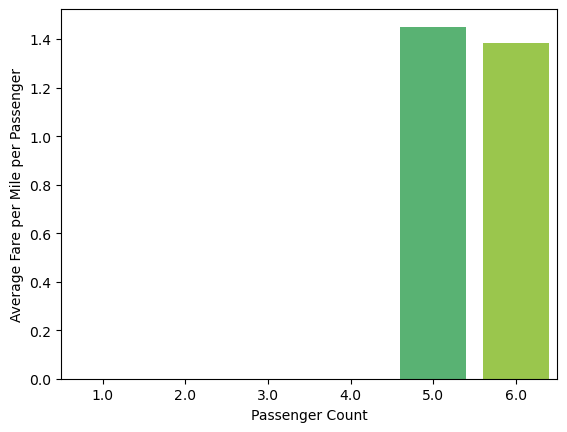

In [693]:
# Analyse the fare per mile per passenger for different passenger counts

total_amount_zero_df = sampled_df[sampled_df['total_amount'] > 0]
sampled_df['fare_per_mile_per_passenger'] = sampled_df['fare_amount'] / (sampled_df['trip_distance'] * sampled_df['passenger_count'])

# group by passenger count
grouped_data = sampled_df.groupby('passenger_count')

average_fare_per_mile_per_passenger = grouped_data['fare_per_mile_per_passenger'].mean().reset_index()

sns.barplot(x='passenger_count', y='fare_per_mile_per_passenger', data=average_fare_per_mile_per_passenger, palette='viridis')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger')
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

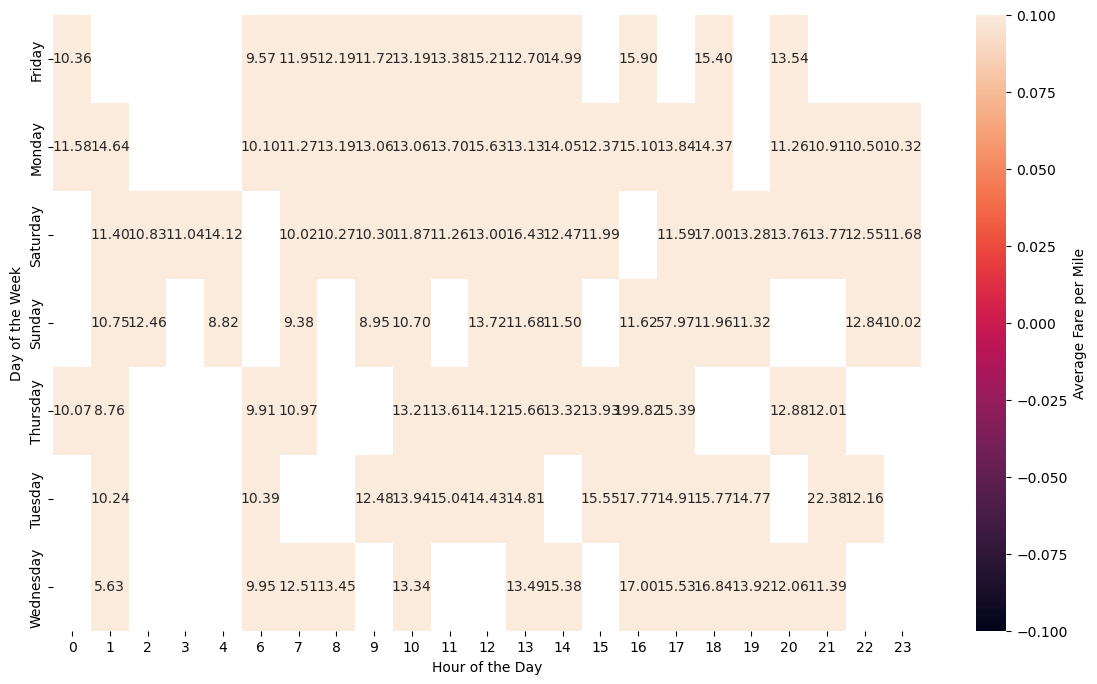

In [741]:
# Compare the average fare per mile for different days and for different times of the day


sampled_df['day_of_week'] = sampled_df['tpep_pickup_datetime'].dt.day_name()
sampled_df['hour_of_day'] = sampled_df['tpep_pickup_datetime'].dt.hour

sampled_df['fare_per_mile'] = sampled_df['total_amount'] / sampled_df['trip_distance']

hourly_data = sampled_df.groupby('hour_of_day')['fare_per_mile'].mean().reset_index()
daily_data = sampled_df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

grouped_data = sampled_df.groupby(['day_of_week', 'hour_of_day'])['fare_per_mile'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(grouped_data, annot=True, fmt=".2f", cbar_kws={'label': 'Average Fare per Mile'})
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

   VendorID  fare_per_mile
0         1            inf
1         2            inf


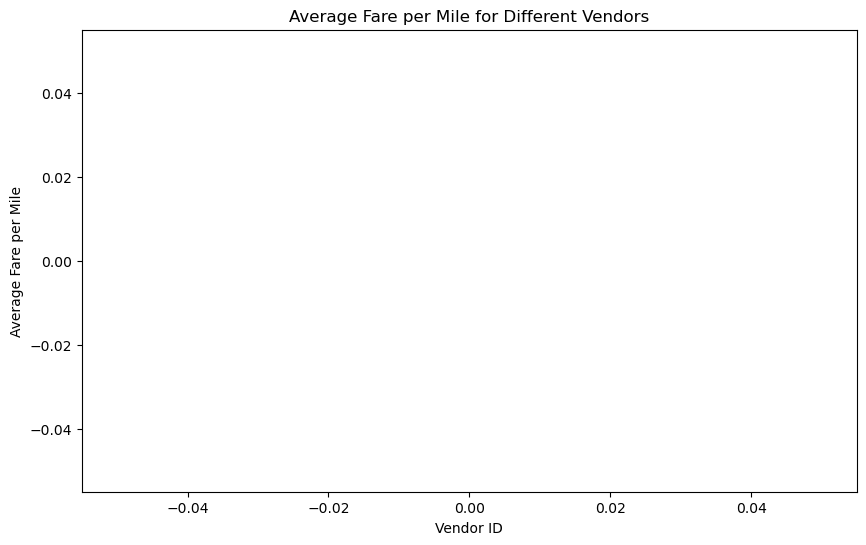

In [823]:
# Compare fare per mile for different vendors

sampled_df['fare_per_mile'] = sampled_df['total_amount'] / sampled_df['trip_distance']


# Calculate the average fare per mile for each vendor
average_fare_per_mile = sampled_df.groupby('VendorID')['fare_per_mile'].mean().reset_index()
print(average_fare_per_mile.head())

# Plot the results using a bar plot
plt.figure(figsize=(10, 6))
#sns.barplot(x='VendorID', y='fare_per_mile', data=average_fare_per_mile, palette='viridis')
plt.bar(average_fare_per_mile['VendorID'], average_fare_per_mile['fare_per_mile'], color=['blue', 'green'])
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile for Different Vendors')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


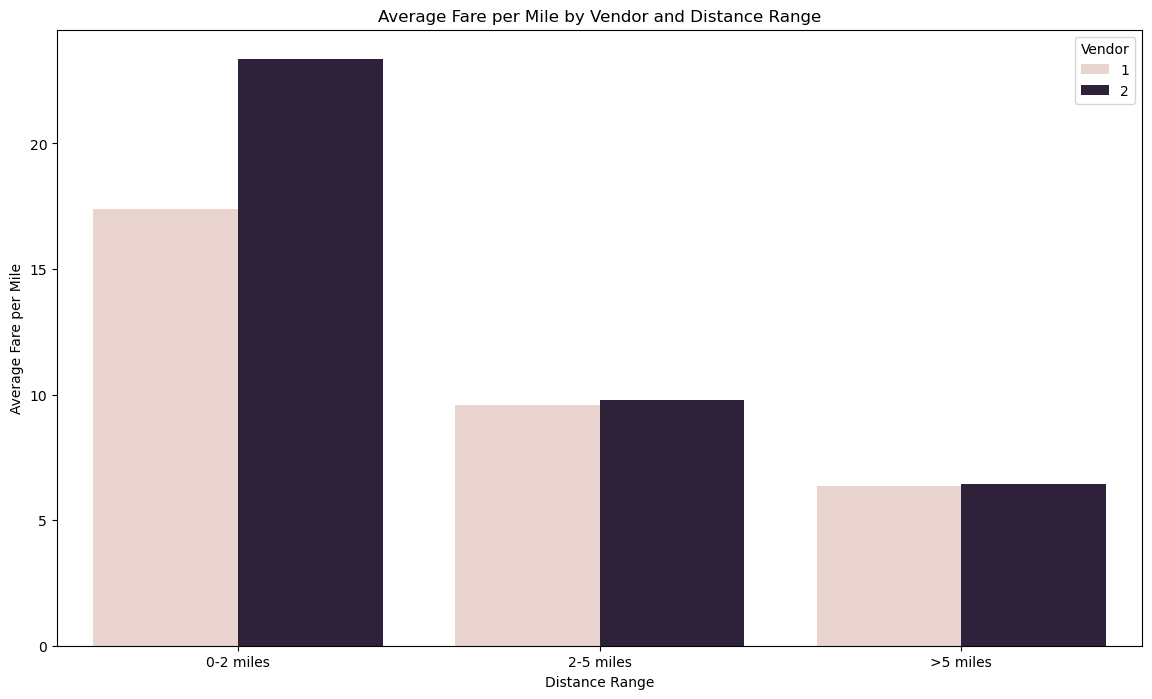

In [803]:
# Defining distance tiers
# Convert the pickup datetime to a datetime object


# Create distance bins for different ranges
bins = [0, 2, 5, float('inf')]
labels = ['0-2 miles', '2-5 miles', '>5 miles']
sampled_df['distance_bin'] = pd.cut(trip_data['trip_distance'], bins=bins, labels=labels)

# Group the data by vendor and distance bins
grouped_data = sampled_df.groupby(['VendorID', 'distance_bin'])['fare_per_mile'].mean().reset_index()


plt.figure(figsize=(14, 8))
sns.barplot(x='distance_bin', y='fare_per_mile', hue='VendorID', data=grouped_data)
plt.xlabel('Distance Range')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile by Vendor and Distance Range')
plt.legend(title='Vendor')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

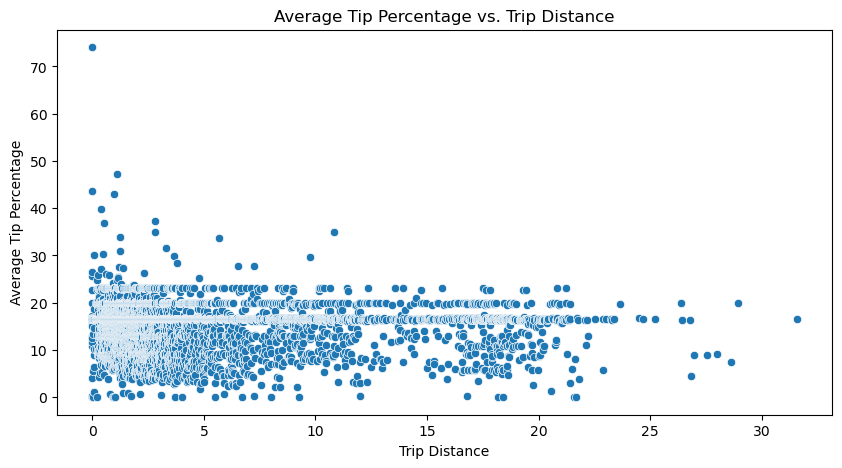

In [791]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

sampled_df['hour_of_day'] = sampled_df['tpep_pickup_datetime'].dt.hour
sampled_df['tip_percentage'] = (sampled_df['tip_amount'] / sampled_df['total_amount']) * 100

# group the data by trip distance, passenger count, and hour
grouped_data = sampled_df.groupby(['trip_distance', 'passenger_count', 'hour_of_day'])
average_tip_percentage = grouped_data['tip_percentage'].mean().reset_index()



plt.figure(figsize=(10, 5))
sns.scatterplot(x='trip_distance', y='tip_percentage', data=average_tip_percentage)
plt.xlabel('Trip Distance')
plt.ylabel('Average Tip Percentage')
plt.title('Average Tip Percentage vs. Trip Distance')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='passenger_count', y='tip_percentage', data=average_tip_percentage)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.title('Average Tip Percentage vs. Passenger Count')
plt.show()


plt.figure(figsize=(10, 5))
sns.scatterplot(x='hour_of_day', y='tip_percentage', data=average_tip_percentage)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.title('Average Tip Percentage vs. Passenger Count')
plt.show()




Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

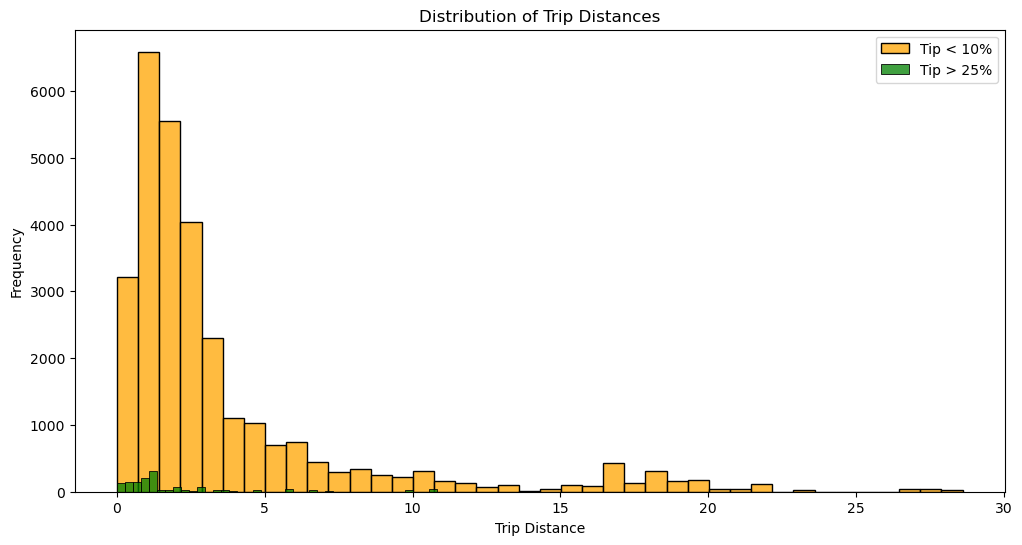

In [789]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

sampled_df['hour_of_day'] = sampled_df['tpep_pickup_datetime'].dt.hour

# Calculate the tip percentage for each trip
sampled_df['tip_percentage'] = (sampled_df['tip_amount'] / sampled_df['total_amount']) * 100

# Filter the data for trips with tip percentage < 10% and > 25%
low_tip_trips = sampled_df[sampled_df['tip_percentage'] < 10]
high_tip_trips = sampled_df[sampled_df['tip_percentage'] > 25]


plt.figure(figsize=(12, 6))
sns.histplot(low_tip_trips['trip_distance'], color='orange', label='Tip < 10%', bins=40)
sns.histplot(high_tip_trips['trip_distance'], color='green', label='Tip > 25%', bins=40)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')
plt.legend()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [295]:
# See how passenger count varies across hours and days

sampled_df['hour_of_day'] = sampled_df['tpep_pickup_datetime'].dt.hour
sampled_df['day_of_week'] = sampled_df['tpep_pickup_datetime'].dt.dayofweek

# group by hour and day of the week
grouped_data = sampled_df.groupby(['hour_of_day', 'day_of_week'])
average_passenger_count = grouped_data['passenger_count'].mean().reset_index()


plt.figure(figsize=(10, 5))
sns.scatterplot(x='hour_of_day', y='passenger_count', data=average_passenger_count)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.title('Average Tip Percentage vs. Passenger Count')
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

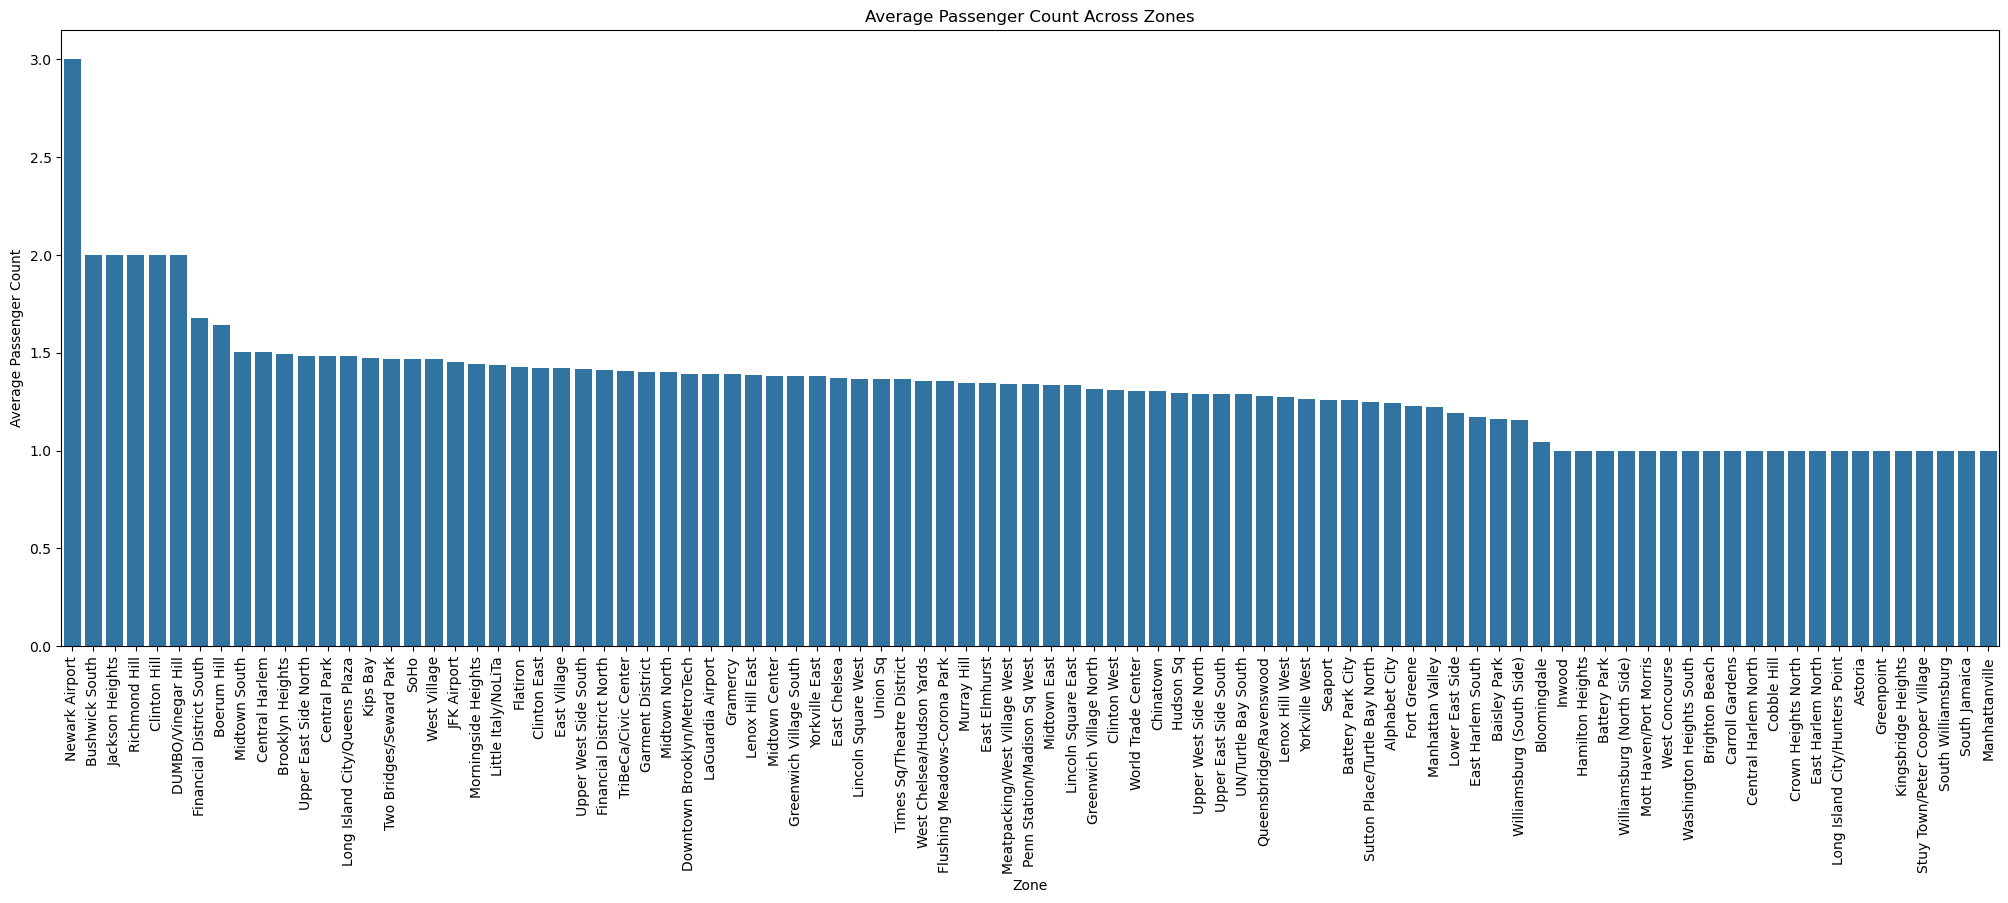

In [591]:
# How does passenger count vary across zones

grouped_data = merged_trip_data.groupby('zone')
average_passenger_count = grouped_data['passenger_count'].mean().reset_index()

average_passenger_count = average_passenger_count.sort_values(by='passenger_count', ascending=False)


plt.figure(figsize=(25, 8))
sns.barplot(x='zone', y='passenger_count', data=average_passenger_count)
plt.xlabel('Zone')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count Across Zones')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.


average_passenger_count = average_passenger_count.sort_values(by='passenger_count', ascending=False)


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

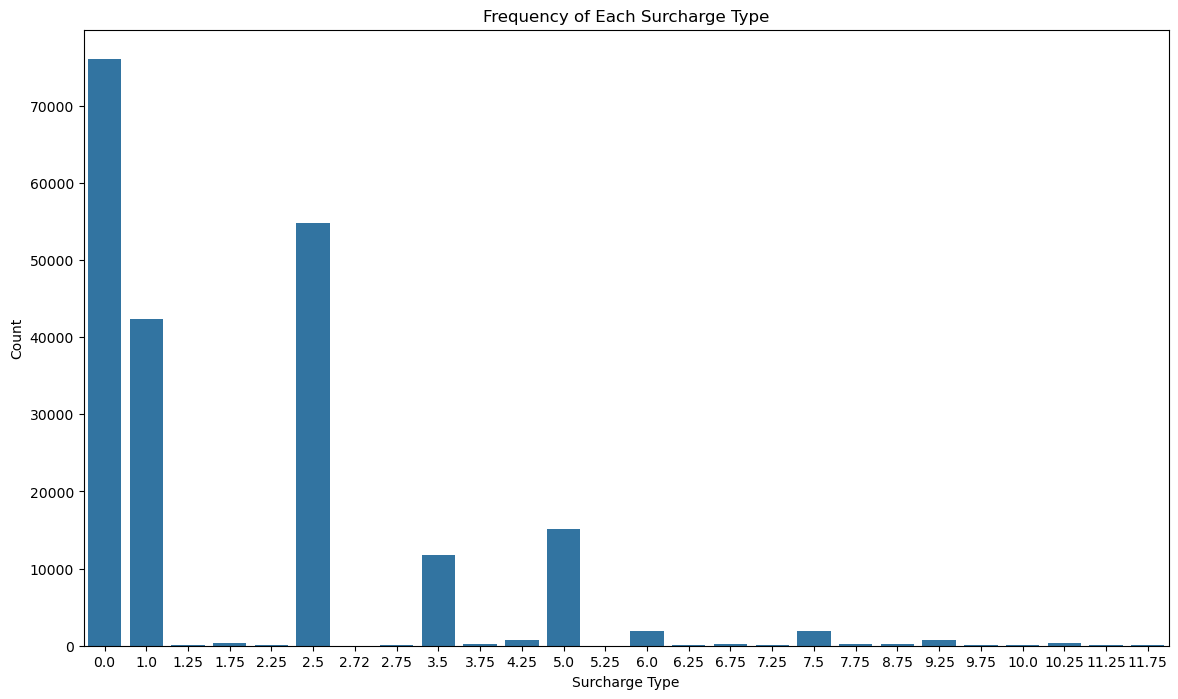

In [835]:
# How often is each surcharge applied?

surcharge_counts = sampled_df['extra'].value_counts().reset_index()

surcharge_counts.columns = ['surcharge', 'count']

plt.figure(figsize=(14, 8))
sns.barplot(x='surcharge', y='count', data=surcharge_counts)
plt.xlabel('Surcharge Type')
plt.ylabel('Count')
plt.title('Frequency of Each Surcharge Type')
plt.show()
trip_data=sampled_df
trip_data['dropoff_datetime'] = pd.to_datetime(trip_data['tpep_dropoff_datetime'])
trip_data['trip_duration'] = (trip_data['dropoff_datetime'] - trip_data['tpep_pickup_datetime']).dt.total_seconds() / 60


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:

Increase the dirvers during the peak hours which is from 4 PM to 8 PM. Use dynamic pricing during these peek hours 
to balance supply and demand. Offer incentive during the non peak hours which 12PM to 6 PM. 

Average fare price is more for trip distances with less than 2 miles. So encourage short distance trips and increase fare 
for long trip distacnes to decrease the demannd. 


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:

Demand in zone 138 is less during the peak hours and more in 161. So to optimize operational efficieny deploy few vehicles 
from 138 zone to  161 zone. This will help to meet the peak hours demand in 161 zone and decrease idle time in 138 zone.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Use dynamic pricing during these peek hours to balance supply and demand. Offer incentive during the non peak hours which 12PM to 6 PM. 
This helps to balance supply and demand in during peak hours.